# DVA256 - Data Management and Datafication

## Exercise 3

The exercise 3 covers the topics of signal processing. It also evaluates the students' understanding of the methods and how the methods can be used to convert raw sigals into valuable information for conducting advanced data analytics.

In [504]:
#################################################
#  Install and Import required libraries here   #
#################################################

!pip install pynput -q
!pip install pvrecorder -q
!pip install librosa -q

import os

import numpy as np
import pandas as pd

import wave
import struct
import librosa
from pvrecorder import PvRecorder

from scipy.io.wavfile import read as wav_read
from scipy.fft import fft, fftfreq
from scipy.stats import entropy as entropy_function

from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

import matplotlib.cm as cm
import matplotlib.pyplot as plt

from IPython.display import Audio

import warnings
warnings.filterwarnings("ignore")

## Question 1.

You are going to use the ‘accelerometer.csv’ dataset for this task.


In [503]:
# Read the accelerometer csv file
df = pd.read_csv('accelerometer.csv')
df.head(100)

,wconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121
3,1,20,0.973,-0.012,-0.137
4,1,20,1.000,-0.016,-0.121
...,...,...,...,...,...
95,1,20,1.027,0.105,-0.121
96,1,20,0.977,0.012,-0.145
97,1,20,1.023,0.090,-0.125
98,1,20,0.969,0.102,-0.105


In [491]:
print("Unique values in wconfid and pctid columns")
print("------------------------------------------")
print("Weight Configuration ID:", df['wconfid'].unique())
print("Rotation speeds:", df['pctid'].unique())

Unique values in wconfid and pctid columns
------------------------------------------
Weight Configuration ID: [1 2 3]
Rotation speeds: [ 20  25  30  35  40  45  50  55  60  65  70  75  80  85  90  95 100]


#### Data description

The accelerometer data contains vibrations measures of a cooling fan with weights on its blades which can be used for vibration analysis. 

There are 5 attributes in the dataset:

        wconfid, pctid, x, y and z.


<strong>wconfid:</strong> Weight Configuration ID (1 - 'red' - normal configuration; 2 - 'blue' - perpendicular configuration; 3 - 'green' - opposite configuration)

<strong>pctid:</strong> Cooler Fan RPM Speed Percentage ID (20 means 20%, and so on).

<strong>x:</strong> Accelerometer x value.

<strong>y:</strong> Accelerometer y value.

<strong>z:</strong> Accelerometer z value. 

Seventeen rotation speeds were set up, ranging from 20% to 100% of the cooler maximum speed at 5% intervals; for the three weight distribution configurations in the cooler's blades.

The vibration measurements were collected at a frequency of 20 ms for 1 min for each percentage, generating 3000 records per speed. Thus, 153,000 vibration records were collected from the simulation model.


For this task you only consider the pctid of 20%, 35%, 50%, 85% and 100% interval. 

#### <strong>Part A:</strong> Perform frequency analysis using FFT for each $x$, $y$ and $z$ signal with respect to the three wconfid ids and five pctid intervals.

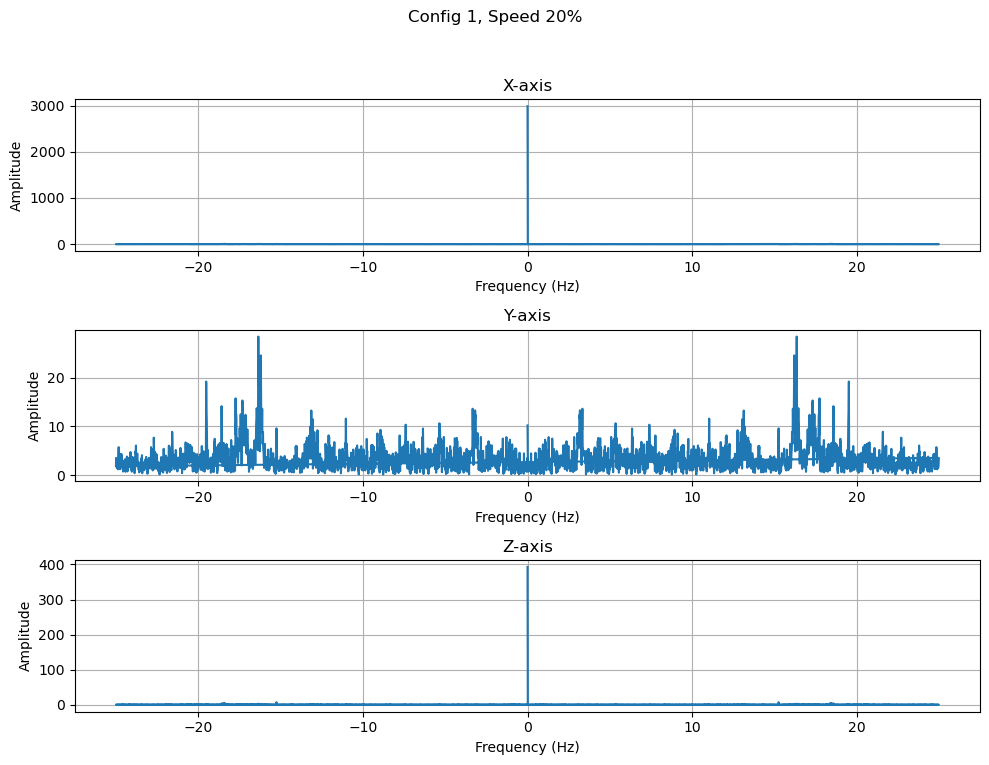

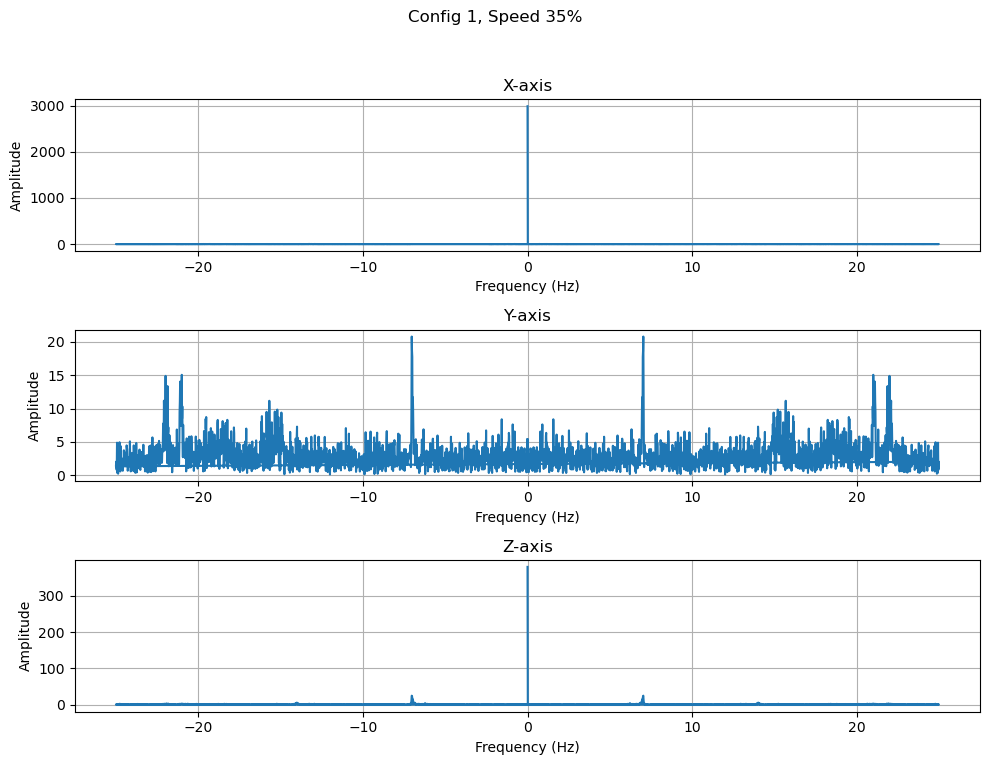

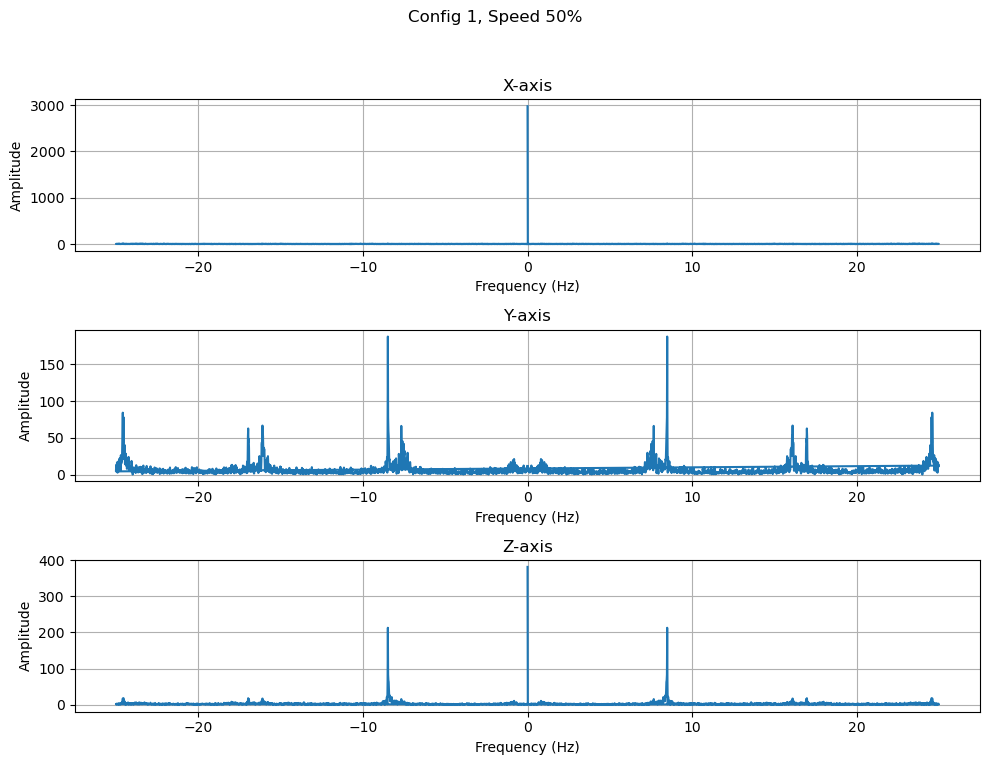

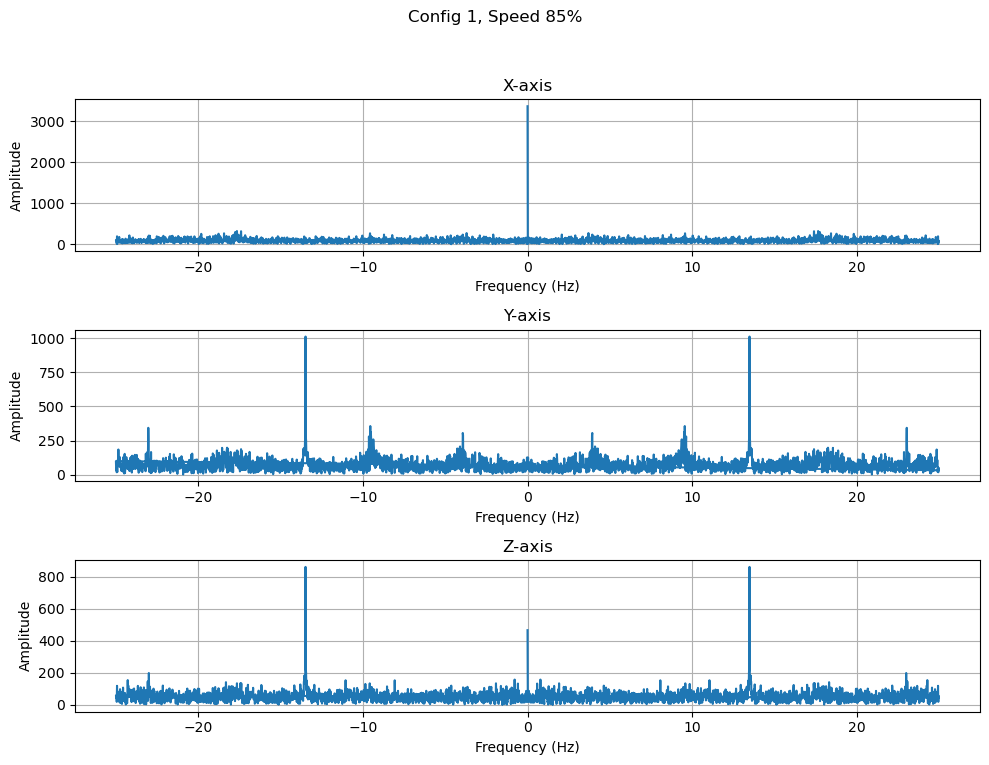

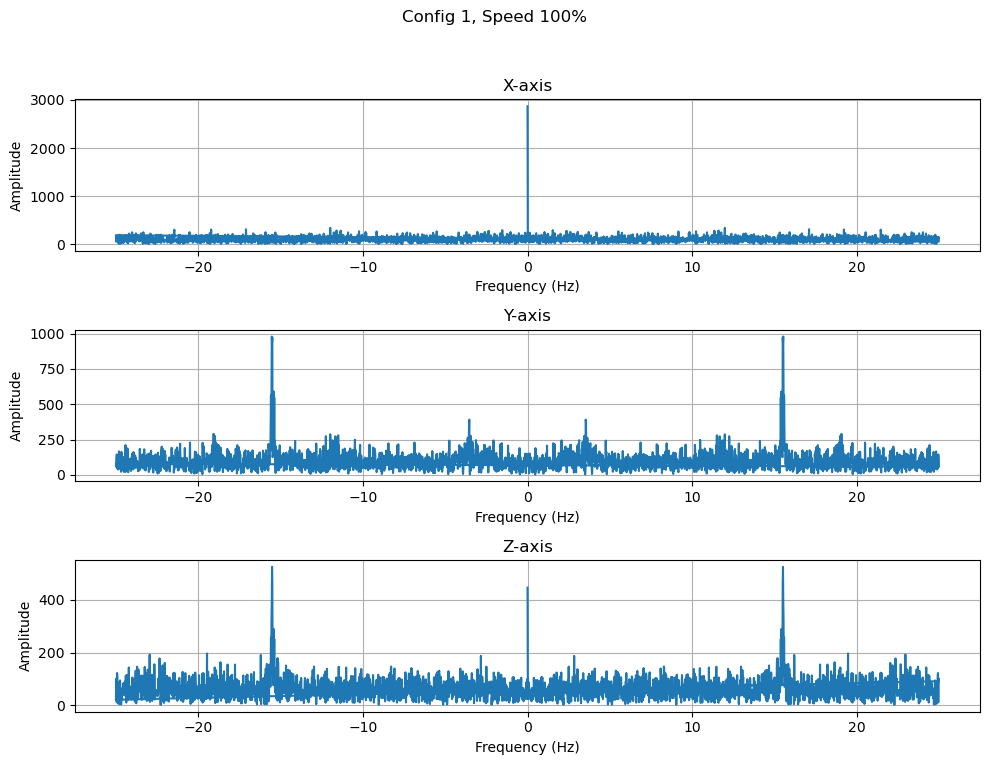

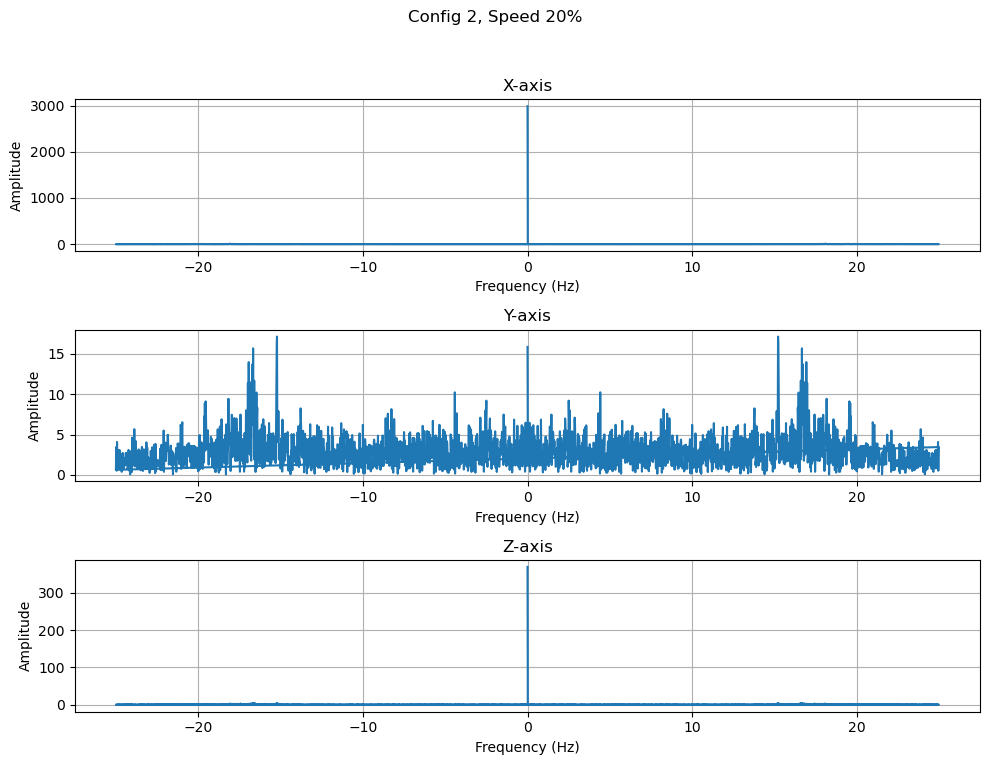

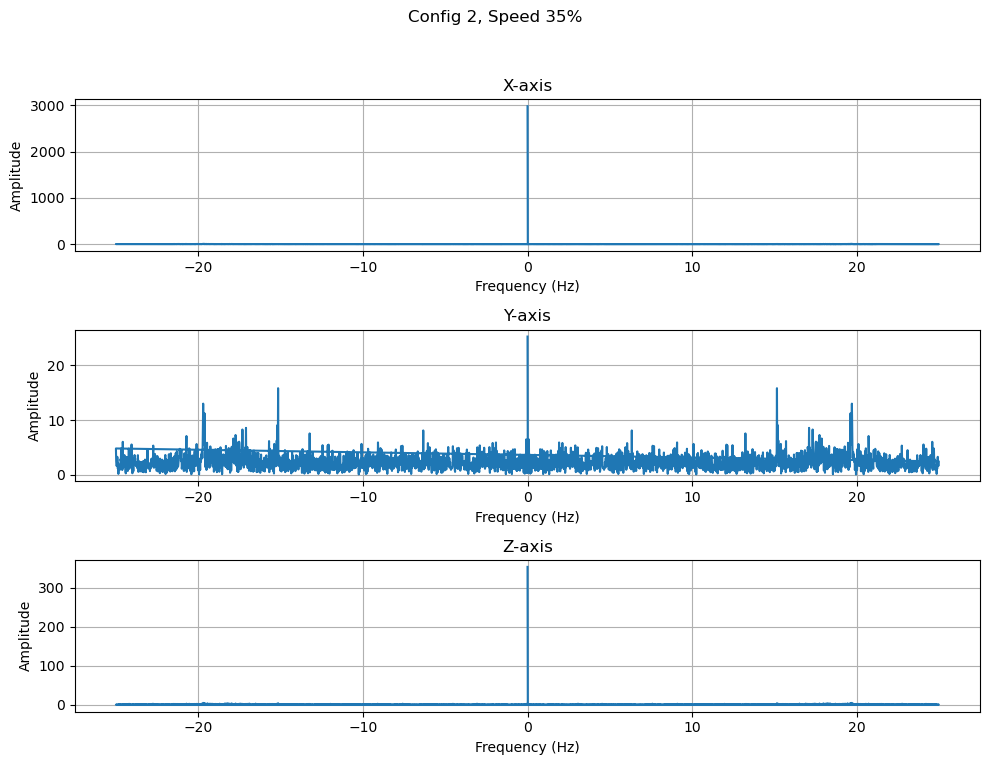

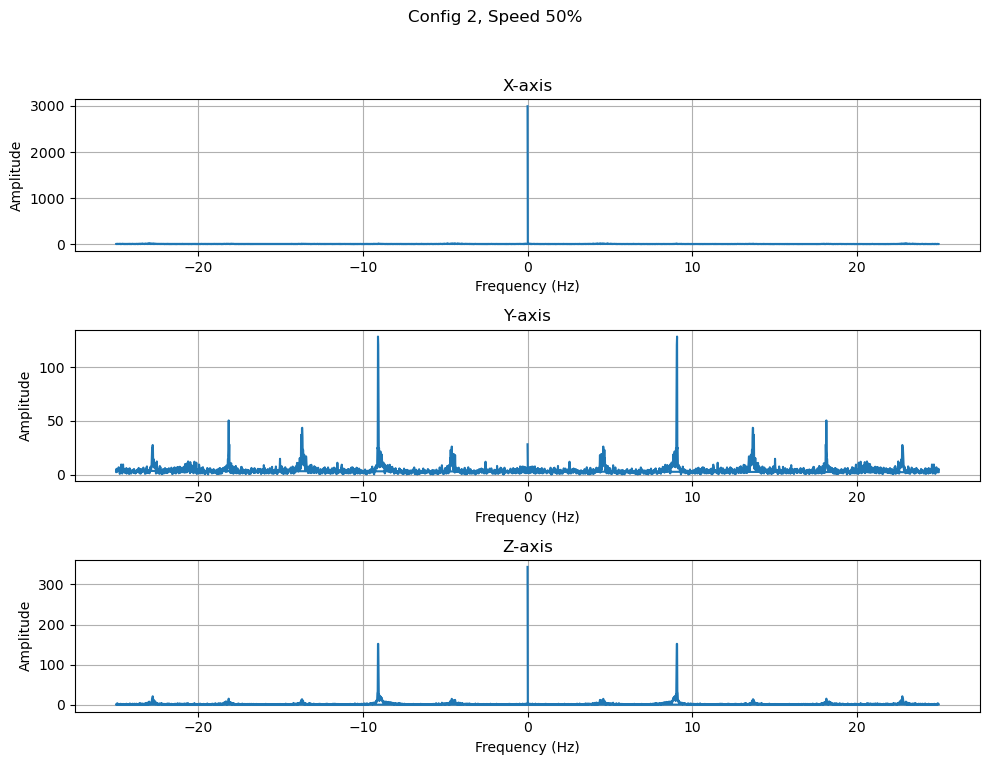

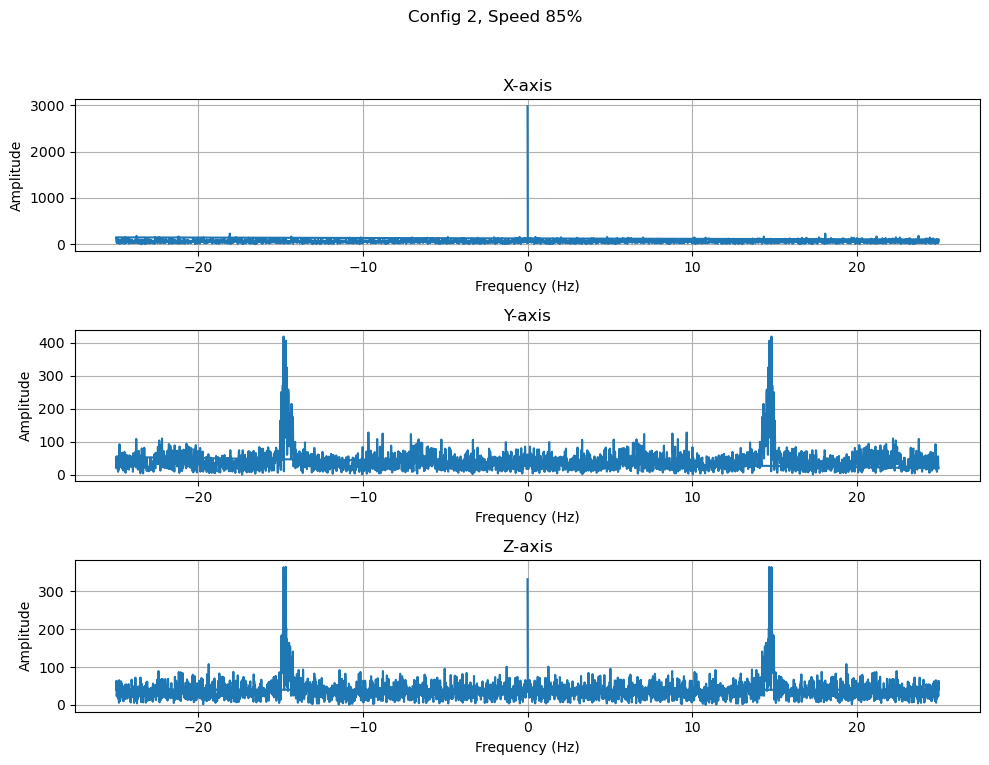

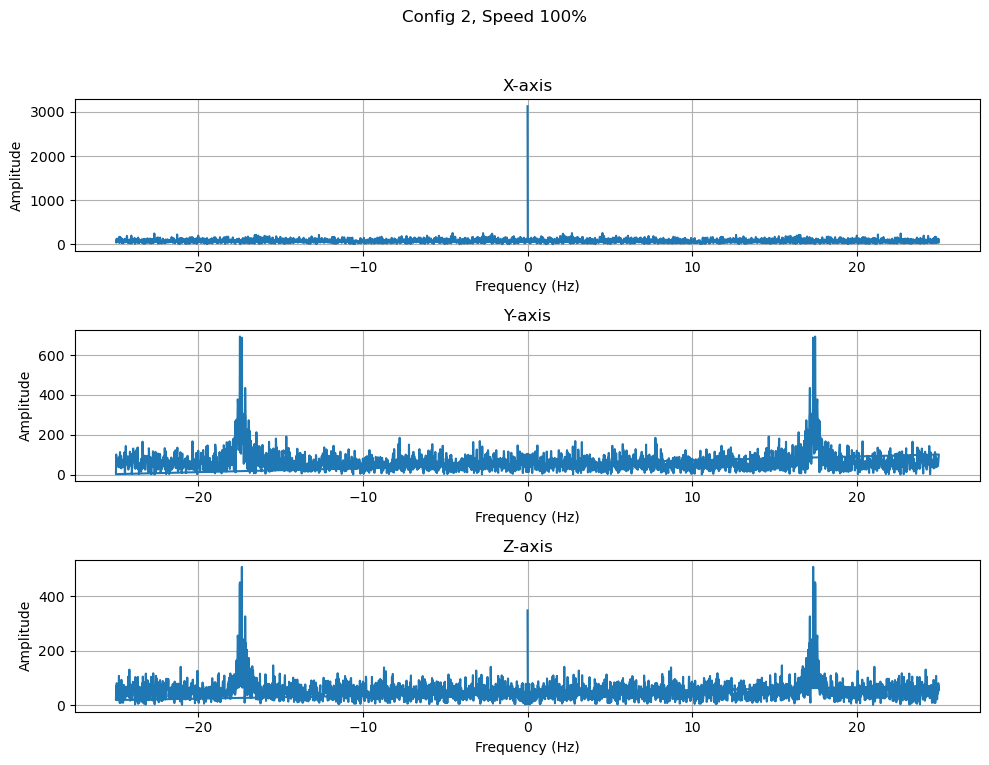

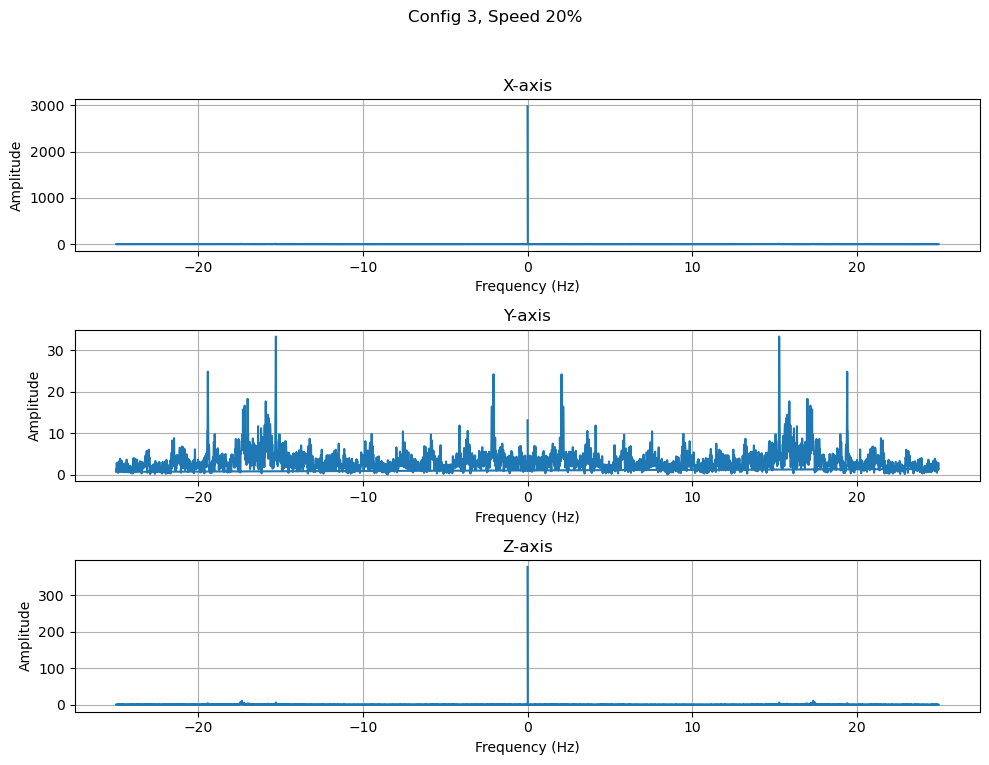

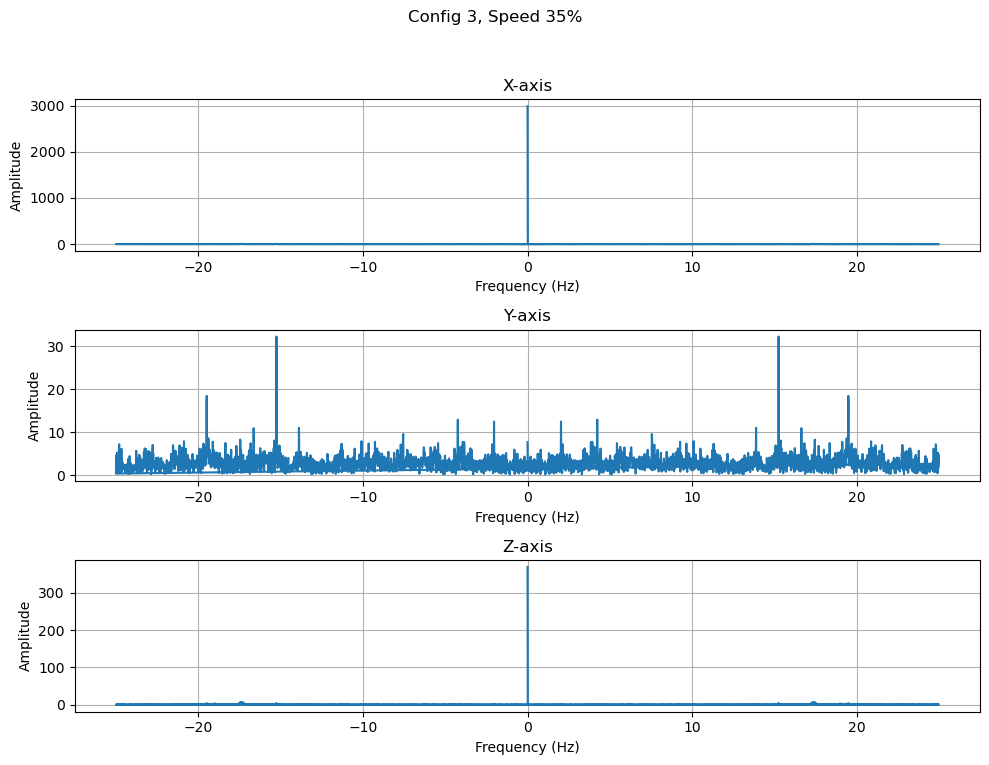

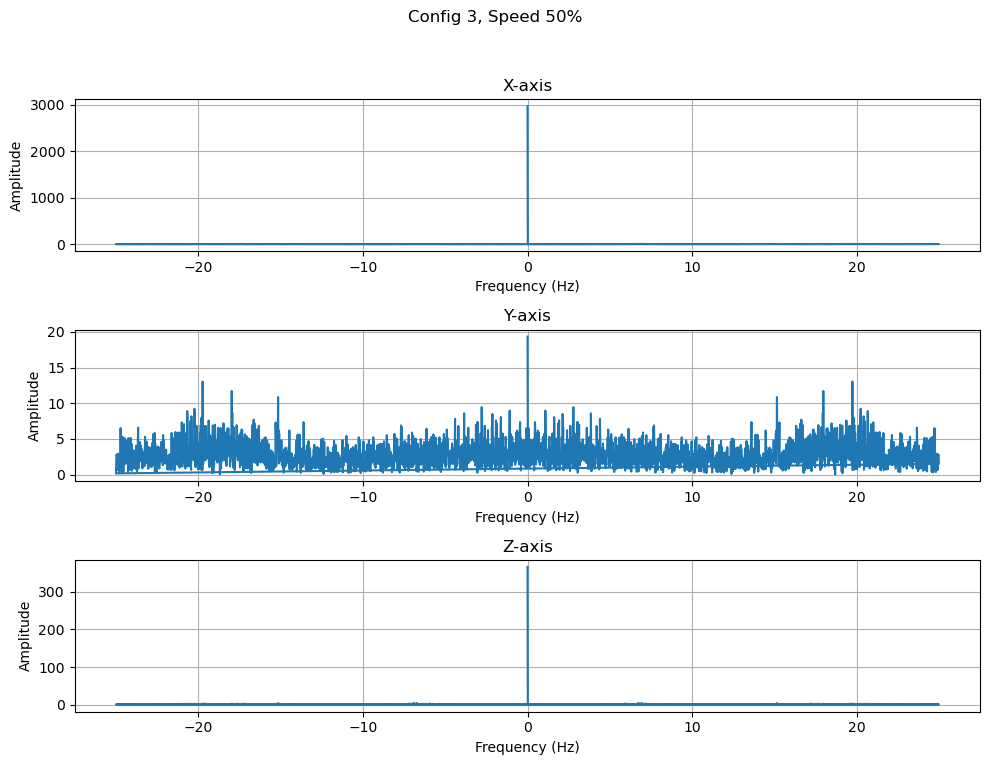

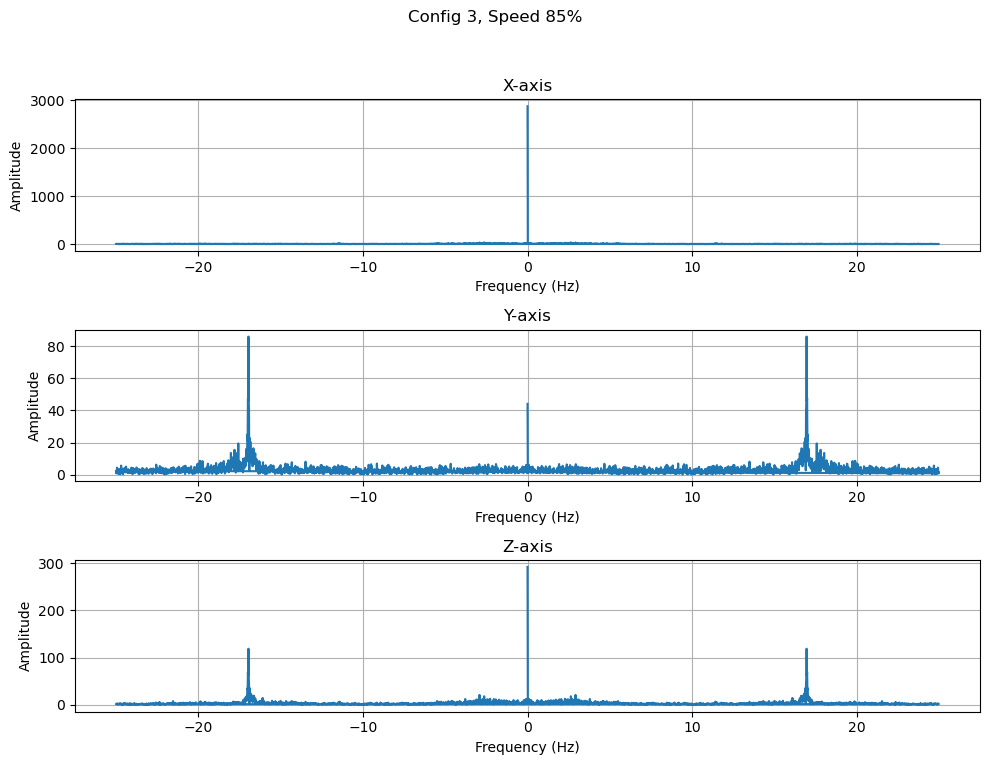

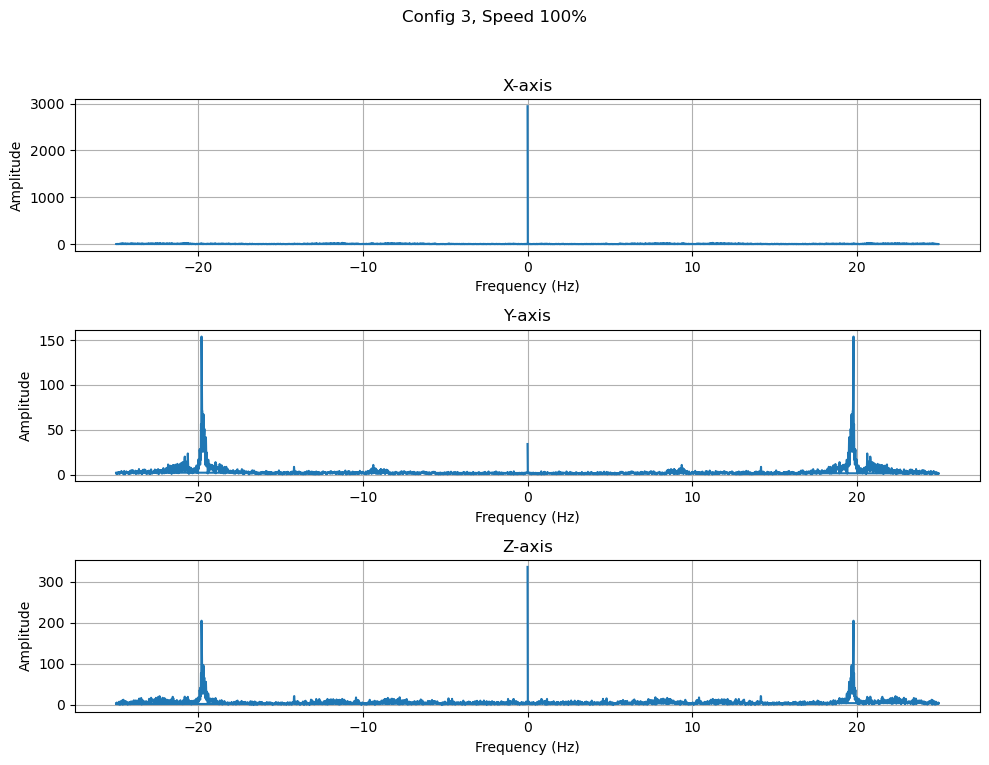

'FOR LOOP'

In [492]:
def frequencyAnalysis(signal):
    ###
    #   description:  
    #       this function performs frequency analysis.
    #  
    #   input parameters: 
    #       signals (array_like): A single signal, i.e., either x, y, or z signal.
    #
    #   output parameters: 
    #       f (array_like): frequencies in a signal.
    #       amp (array_like): amplitude of the frequencies.
    ### 

    ###
    #  INSERT YOUR CODE.
    ### 
    
    sample_rate = 50  
    N = len(signal)
    yf = fft(signal)
    xf = fftfreq(N, 1 / sample_rate)
    amp = np.abs(yf)
    
    
    return xf, amp

    


def plotFrequency(f, amp, title, ax):
    ###
    #   description:  
    #       this function plots power specturn density.
    #  
    #   input parameters: 
    #       f (array_like): frequencies in a signal.
    #       amp (array_like): amplitude of the frequencies.
    #
    ### 

    ###
    #  INSERT YOUR CODE.
    ###  
     
    ax.plot(f, amp)
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Amplitude')
    ax.set_title(title)
    ax.grid(True)


#####################################################################
#  Call the functions for frequency analysis and plot the results   #
#  INSERT YOUR CODE BELOW                                           #
#####################################################################
#print(df[:3000*17])


pctids = [20, 35, 50, 85, 100]
df = df[df['pctid'].isin(pctids)]

for wconfid in range(1, 4):
    for pctid in pctids:
        fig, axs = plt.subplots(3, 1, figsize=(10, 8))
        fig.suptitle(f'Config {wconfid}, Speed {pctid}%')
        subset = df[(df['wconfid'] == wconfid) & (df['pctid'] == pctid)]
        for i, axis in enumerate(['x', 'y', 'z']):
            signal = subset[axis].values  
            xf, amp = frequencyAnalysis(signal)
            plotFrequency(xf, amp, f'{axis.upper()}-axis', axs[i])
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()



####
# Tips: You need to sgement the signals according to the three wconfid ids and five pctid intervals.
#       You should plot spectral information of x, y and z signals in the same figure. 
#       There should be fifteen figures in a combination of three wconfid ids and five pctid intervals
####

"""FOR LOOP"""



#### <strong>Part B:</strong> Extract fearures from each wconfid

     (1) Time domain features: RMS, Variance, Power

     (2) Frequency domain features: Mean of band power spectrum, Maximum of band power spectrum, Sum of total 
         band power, variance of band power
     (3) Compute the signal complexity, i.e., entropy


In [493]:
# Extract the Time domain features
def timeFeatures(signal):
    ###
    #   description:  
    #       this function extracts time domain features from a signal
    #  
    #   input parameters: 
    #       signal (array_like): A single signal, i.e., either x, y, or z signal.
    #
    #   output parameters: 
    #       RMS (scalar)      : estimated root mean suqare of a signal
    #       Variance (scalar) : estimated variance of a signal
    #       Power (scalar)    : estimated power of a signal
    #
    ### 

    ###
    #  INSERT YOUR CODE.
    ###    
    
    rms = np.sqrt(np.mean(signal**2))
    var = np.var(signal)
    power = np.mean(signal**2)
    
    return rms, var, power
 


# Extract the Frequency domain features 
def frequencyFeatures(signal):    
        ###
    #   description:  
    #       this function performs frequency analysis.
    #  
    #   input parameters: 
    #       signal (array_like): A single signal, i.e., either x, y, or z signal.
    #
    #   output parameters: 
    #       meanBP (scalar) : estimated Mean of band power spectrum a signal
    #       maxBP (scalar)  : estimated Maximum of band power spectrum of a signal
    #       sumBP (scalar)  : estimated Sum of total band power of a signal
    #       varBP (scalar)  : estimated variance of band power of a signal
    #
    ### 
    ### 

    ###
    #  INSERT YOUR CODE.
    ###    
    
    fftv = fft(signal)
    
    #powerspectrum = np.abs(fftv)**2

    #ft = fft(X)

    powerspectrum = np.abs(fftv**2)/len(signal)


    meanBP = np.mean(powerspectrum)
    maxBP = np.max(powerspectrum)
    sumBP = np.sum(powerspectrum)
    varBP = np.var(powerspectrum)
    
    
    return meanBP, maxBP, sumBP, varBP

    
 


# Compute signal complexity using entropy
def signalComplexity(signal):    
        ###
    #   description:  
    #       this function performs frequency analysis.
    #  
    #   input parameters: 
    #       signal (array_like): A single signal, i.e., either x, y, or z signal.
    #
    #   output parameters: 
    #       entropy (scalar) : estimated signal complexity using entropy
    ### 

    ###
    #  INSERT YOUR CODE.
    ###
    
    fftv = fft(signal)
    magnitudes = np.abs(fftv)
    entropy_value = entropy_function(magnitudes)
    return entropy_value
    




In [494]:
# We need use the timeFeatures, ferquencyFeatures and signalComplexity functions 
# You have extrcat features from each x, y and z signals.
# Remember there are three unique values in wconfid and we are interested in five pctid values.

"""

You need store the extracted feature in a dataframe in the following format


        Structure of the feature dataframe
        ----------------------------------------------------------------------------------
        index signal wconfid pctid  RMS  Variance  Power  meanBP  maxBP  sumBP  varBP  entropy
          0     @       #      **     *      *       *       *      *       *      *       *
          1     @       #      **     *      *       *       *      *       *      *       *
          2     @       #      **     *      *       *       *      *       *      *       *
          .
          .
          .
          n

       
        Where  '@ = {x, y, z}', '# = {1, 2, 3}', '** = {20, 35, 50, 85, 100}', and '* = {estimated feature value}'

"""

############################################################
#  Call the functions and store the output in dataframes   #
#  INSERT YOUR CODE                                        #
############################################################       

###################
# Tips: You need to sgement the signals according to the three wconfid ids and five pctid intervals.
#       You should the same approach as you did for the Part A of Question 3
###################

pctids = [20, 35, 50, 85, 100]
df = df[df['pctid'].isin(pctids)]
features_list = []

for wconfid in range(1, 4):
    for pctid in pctids:
        subset = df[(df['wconfid'] == wconfid) & (df['pctid'] == pctid)]
        
        for i, axis in enumerate(['x', 'y', 'z']):
            signal = subset[axis].values  
            
            rms, var, power = timeFeatures(signal)
            meanBP, maxBP, sumBP, varBP = frequencyFeatures(signal)
            entropy_value = signalComplexity(signal)

            features_list.append({
                'signal': axis,
                'wconfid': wconfid,
                'pctid': pctid,
                'RMS': rms,
                'Variance': var,
                'Power': power,
                'meanBP': meanBP,
                'maxBP': maxBP,
                'sumBP': sumBP,
                'varBP': varBP,
                'entropy': entropy_value
            })

features_df = pd.DataFrame(features_list)
features_df





,signal,wconfid,pctid,RMS,Variance,Power,meanBP,maxBP,sumBP,varBP,entropy
0,x,1,20,0.995164,0.000627,0.990351,0.990351,2969.173598,2971.054335,2937.683159,4.809079
1,y,1,20,0.080805,0.006518,0.006529,0.006529,0.270973,19.588221,0.000201,7.770076
2,z,1,20,0.131711,0.000173,0.017348,0.017348,51.523356,52.043306,0.884585,6.755789
3,x,1,35,0.995354,0.000900,0.990730,0.990730,2969.489969,2972.188714,2938.308682,5.324109
4,y,1,35,0.066869,0.004471,0.004471,0.004471,0.144229,13.414262,0.000075,7.810935
5,z,1,35,0.130463,0.001031,0.017020,0.017020,47.967290,51.061462,0.766736,7.260847
6,x,1,50,0.994407,0.004826,0.988845,0.988845,2952.059073,2966.536341,2903.906498,6.583341
7,y,1,50,0.209962,0.044079,0.044084,0.044084,11.767541,132.252161,0.115698,7.543339
8,z,1,50,0.190272,0.020074,0.036203,0.036203,48.387762,108.610125,0.939309,7.373068
9,x,1,85,2.162170,3.410946,4.674978,4.674978,3792.095255,14024.932913,4796.929383,7.825817


## Question 2.
A sample digit dataset is loaded from the scikit-learn library. Data description is available at: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [495]:
# Load digits dataset from scikit-learn library
digits = load_digits(as_frame=True)

# Print the description of the dataset
print(digits['DESCR'])


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

#### Data description
The data consists of 8×8 pixel images, meaning that they are 64-dimensional. To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two.

The digits dataset contains:
   - data         : The flattened data matrix. If as_frame=True, data will be a pandas DataFrame.
   - target       : The classification target. If as_frame=True, target will be a pandas Series.
   - feature_names: The names of the dataset columns.
   - target_names : The names of target classes.
   - images       : The raw image data. It is a ndarray of shape (1797, 8, 8)

#### <strong>Part A:</strong> Find the principal components and visualize them.

In [496]:

# You need to extarct actual data, i.e., features from the dataset to apply PCA.
# Tips: You can use pandas dataframe

#########################################
#  Extract data from the digits dataset #
#  INSERT YOUR CODE BELOW               #
#########################################

data = digits.data
digtarget = digits.target
feature_names = digits.feature_names
target_names = digits.target_names
images = digits.images


x = data.values

# Separating out the target
y = digits.target

#  ?????????? 
# Standardizing the features
scaledData = StandardScaler().fit_transform(x)



print(data.values.shape)




(1797, 64)


<Figure size 640x480 with 0 Axes>

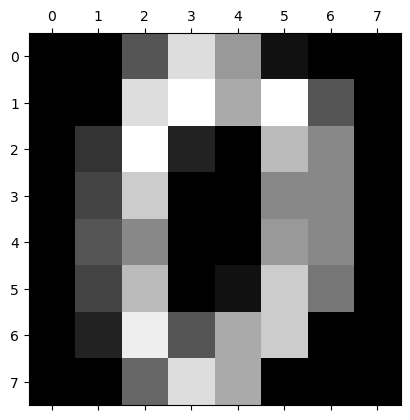

<Figure size 640x480 with 0 Axes>

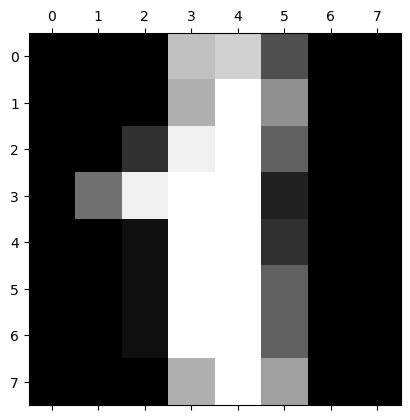

In [497]:
###########################################  
#  Function to plot a single digit image  # 
#  INSERT YOUR CODE BELOW                 #
###########################################

def plot_image(imgData):
    ###
    #   description:  
    #       this function generates a plot for the given image.
    #  
    #   input parameters: 
    #       imgData (array_like): the image data .
    #
    ### 

    ###
    #  INSERT YOUR CODE TO PLOT A IMAGE.
    ###    
    # Tips: If you want to use the flatten data then you need reshape the data into 8*8 array
    

#def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())"""



    plt.gray()
    plt.matshow(imgData)
    plt.show()

for i, image in enumerate(images):
    plot_image(image)
    if i > 0:
        break

    


    

In [498]:
# Some issues that need to consider before applying PCA
#   - Do we have to preprocess the data?  #how the F should I know? I'm just following your code
#   - Number of components to investigate # 2! We only have 2D images. Obviously, I hope.
#   - How to choose the most important components?

###############################
#  Now apply PCA to the data  # 
#  INSERT YOUR CODE BELOW     #
###############################

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaledData)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])




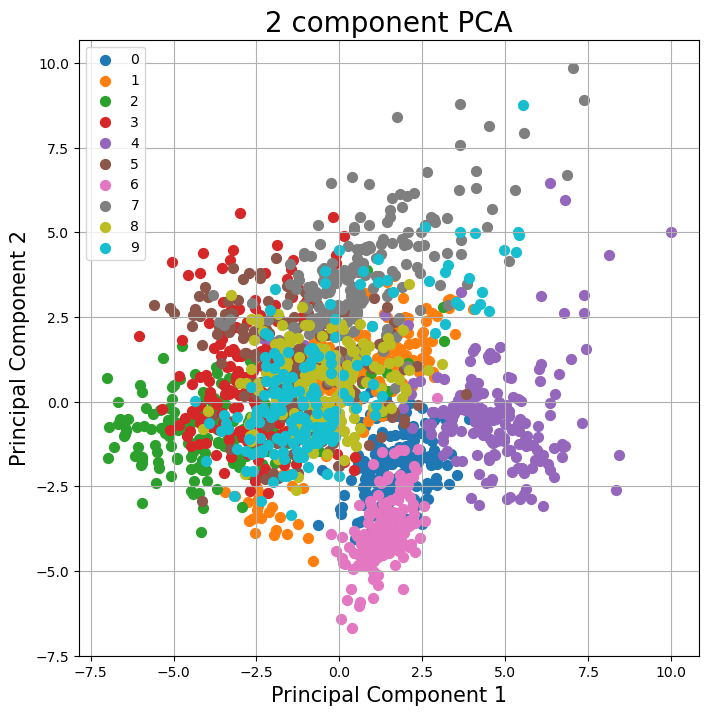

In [499]:
# PCA components can be high dimensional in size. How ever we can only polt either 2D or 3D plot.
# Hence it is interesting to look at most important 2 or 3 components.
# You can either generate 2D or 3D plot for the PCA data 

def visualizePCA(data, digtarget):
    ###
    #   description:  
    #       this function generates a plot for the given data.
    #  
    #   input parameters: 
    #       data (array_like): PCA components (either 2 or 3 components depends on 2D or 3D plot).
    #
    ### 

    ###
    #  INSERT YOUR CODE TO PLOT THE PCA COMPONENTS.
    ###
    
    finalDf = pd.concat([principalDf, digtarget], axis = 1)
    
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    
    ax.set_title('2 component PCA', fontsize = 20)

    targets = target_names
  
    
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
    
    
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['target'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                , finalDf.loc[indicesToKeep, 'principal component 2']
                , c = color
                , s = 50)
    ax.legend(targets)
    ax.grid()
    

    
    pass


#############################
#  PCA Data Visualization   #
#############################
pca_components =  2 # select the componenets you want to plot
visualizePCA(pca_components, digtarget)


#### <strong>Part B:</strong> Add some random noise to the data and clean it again using PCA.

<Figure size 640x480 with 0 Axes>

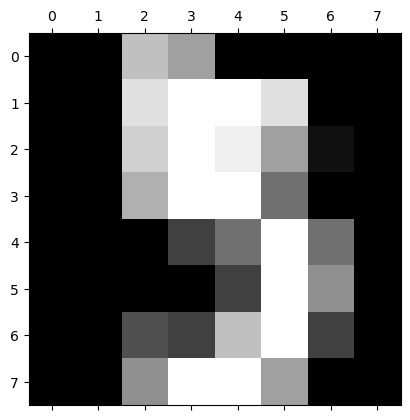

<Figure size 640x480 with 0 Axes>

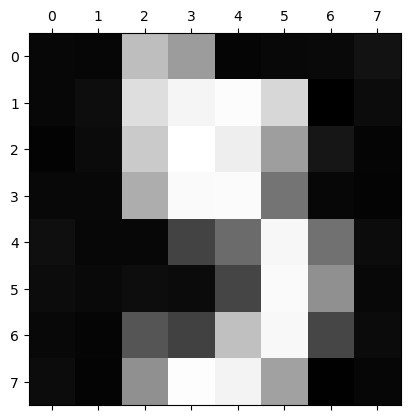

(64, 8, 8)


<Figure size 640x480 with 0 Axes>

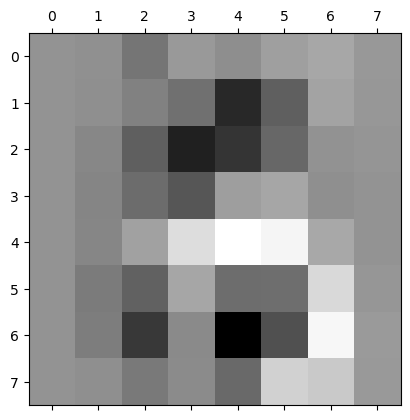

In [500]:

# PCA is one of the tools to clean noisy data. 
# We will first add some random noise to the data to demonstrate how to clean noisy data using PCA.


###########################################
#  Call function to plot a orignal Image  #
#  INSERT YOUR CODE BELOW                 #
###########################################

plot_image(digits.images[5])



############################
#  ADD NOISE TO THE DATE   #
#  INSERT YOUR CODE BELOW  #
############################
def add_noise_to_data(data):
    ###
    #   description:  
    #       this function takes data of a signle image and add random noise to it.
    #  
    #   input parameters: 
    #       data (array_like): Flatten data of digits dataset.
    #   output parameter:
    #      noise_data (array_like): Flatten data after adding random noise to the orignal data.
    #
    ### if data then add heavy metal

    ###
    #  INSERT YOUR CODE.
    ###    
    
    # adding random noise to the images
    rng = np.random.RandomState(0)
    noise = rng.normal(scale=0.25, size=data.shape)
    X_noisy = data + noise
    #new_noisy = np.reshape(X_noisy, (1797, 8, 8))
    
    return X_noisy
    
    # ploting the noisy face images after computing the principle components
    #X_noisy_faces = X_noisy.reshape((X_noisy.shape[0], h, w))

    #X_noisy_faces_titles = ["%s" % y[i] for i in range(X_noisy_faces.shape[0])]
    #plot_gallery(X_noisy_faces, X_noisy_faces_titles, h, w)



################################################
#  Call the function to add noise to the data  #
#  INSERT YOUR CODE BELOW                      #
################################################

x_noisy = add_noise_to_data(data.values)
new_noisy = np.reshape(x_noisy, (1797, 8, 8))

############################################
#  Call function to plot the noisy image   #
#  INSERT YOUR CODE BELOW                  #
############################################
 
plot_image(new_noisy[5])



###################################
#  Clean the noisy data using PCA #
#  INSERT YOUR CODE BELOW         #
###################################




#scaledNoisy = StandardScaler().fit_transform(x_noisy)
n_components=64
pca = PCA(n_components=n_components)
principalComponents = pca.fit(x_noisy)
cleaned_imgs = pca.components_.reshape((n_components, 8,8))
print(cleaned_imgs.shape)

##############################################
#  Call function to plot the filtered image  #
#  INSERT YOUR CODE BELOW                    #
##############################################

plot_image(cleaned_imgs[5])


## Question 3.
Here, we are going to develop a basic Keyword Spotting application. 

#### <strong>Part A:</strong> Prepare audio dataset.

Use the method 'record_audio' below to prepare the dataset with the 'YES' and 'NO' words, each spoken quietly and loudly. Listen to the sample audio files - 'sample_yes_quiet.wav' and 'sample_yes_loud.wav'.

In [501]:
def record_audio(filename):
    ###
    #   description:  
    #       this function records audio from the microphone and saves in a file with the given filename.
    #  
    #   input parameters: 
    #       filename (string): Filename of the wave file to be stored with the recorded audio.
    #   output parameter:
    #       None.
    #
    ### 

    recorder = PvRecorder(device_index = -1, frame_length = 512)
    audio = []
    
    path = filename + '.wav'

    try:
        recorder.start()
        print('##### recording started...')

        while True:
            frame = recorder.read()
            audio.extend(frame)

    except KeyboardInterrupt:
        recorder.stop()
        with wave.open(path, 'w') as f:
            f.setparams((1, 2, 16000, 512, 'NONE', 'NONE'))
            f.writeframes(struct.pack('h' * len(audio), *audio))

        print(f'##### recording stopped and saved in the file {path}')

    finally:
        recorder.delete()

In [502]:
#####################################################
#   Execute/Run this cell to start recording        #
#   Stop the cell execution to stop the recording   #
#####################################################
record_audio('yes_quiet')

##### recording started...


##### recording stopped and saved in the file yes_quiet.wav


In [ ]:
#####################################################
#   Execute/Run this cell to start recording        #
#   Stop the cell execution to stop the recording   # 
#####################################################
record_audio('yes_loud')

##### recording started...
##### recording stopped and saved in the file yes_loud.wav


In [ ]:
#####################################################
#   Execute/Run this cell to start recording        #
#   Stop the cell execution to stop the recording   # 
#####################################################
record_audio('no_quiet')

##### recording started...
##### recording stopped and saved in the file no_quiet.wav


In [ ]:
#####################################################
#   Execute/Run this cell to start recording        #
#   Stop the cell execution to stop the recording   # 
#####################################################
record_audio('no_loud')

##### recording started...
##### recording stopped and saved in the file no_loud.wav


In [ ]:
audio_files = ['yes_quiet', 'yes_loud', 'no_quiet', 'no_loud']
audio_labels = ['Yes Quiet', 'Yes Loud', 'No Quiet', 'No Loud']

audio = {} # dictionary to store the audio signals.
rate = {} # dictionary to stores the sampling rate of the audio files.

for afs in audio_files:
    filename = afs+'.wav' # construct the filename with '.wav' extension.  
    rate[afs], audio[afs] = wav_read(filename) # use wav_read method to read the audio file.

You can hear the audio files you loaded by uncommenting and running the below.

In [ ]:
Audio(audio['yes_quiet'], rate = rate['yes_quiet'])

In [ ]:
Audio(audio['yes_loud'], rate = rate['yes_loud'])

In [ ]:
Audio(audio['no_quiet'], rate = rate['no_quiet'])

In [ ]:
Audio(audio['no_loud'], rate = rate['no_loud'])

<class 'numpy.int16'>
32767


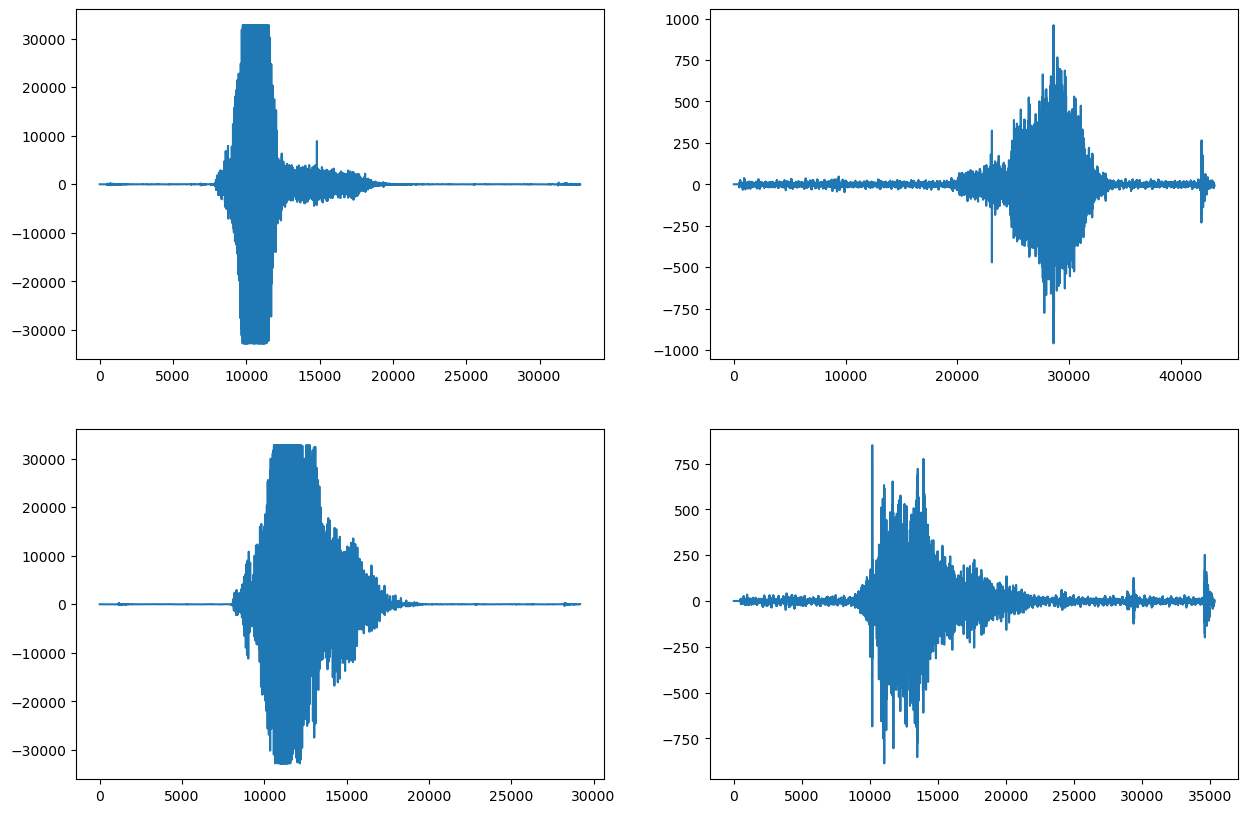

In [ ]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))          

max_val = np.max(np.append(np.append(np.append(audio['yes_loud'], audio['yes_quiet']), audio['no_loud']), audio['no_quiet']))

##################################################################################
#   Write the code here to visualise the signals in plot like shown below        #
##################################################################################
print(type(max_val))
print(max_val)


ax1.plot(audio['yes_loud'])
ax2.plot(audio['yes_quiet'])
ax3.plot(audio['no_loud'])
ax4.plot(audio['no_quiet'])


plt.show()

#### <strong>Part B:</strong> Extract features from the recorded signals in the form of FFT spectrograms.

In [ ]:
ft_audio = {} # dictionary to store the FFTs of the audio signals.

for afs in audio_files: # loops over the contents of all the four audio files.
    ######
    # WRITE YOUR CODE HERE TO CALCULATE THE FFT of the given signal.
    ######
    grej = fft(audio[afs])
    ft_audio[afs] = grej

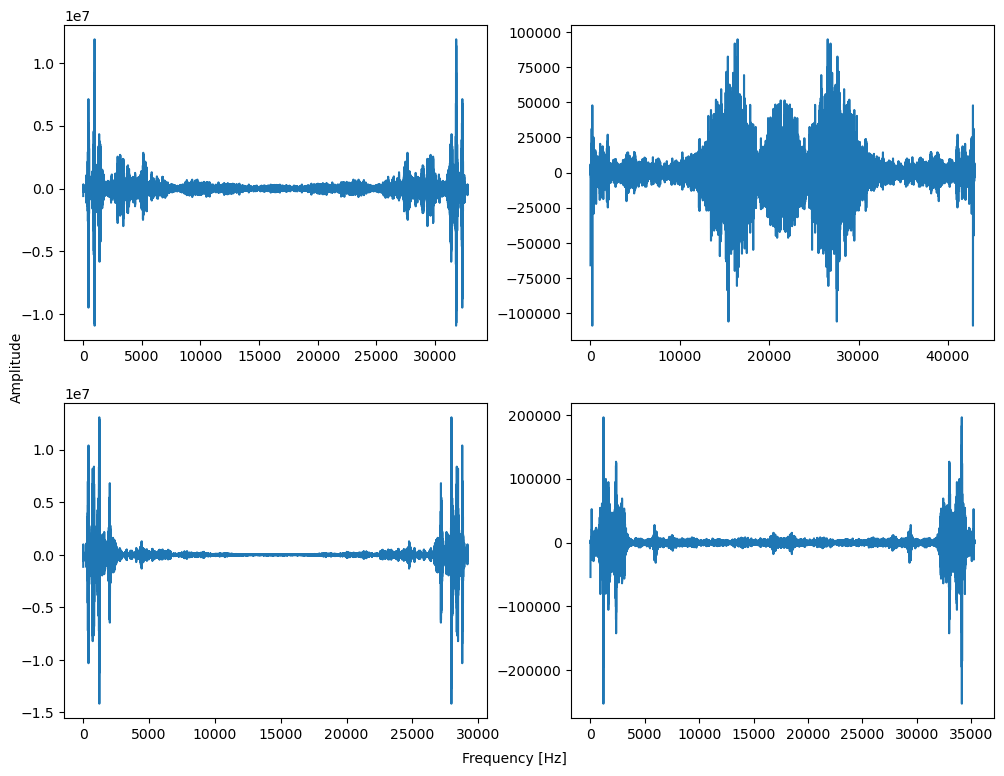

In [ ]:
# Plot the figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2)

#######################################################################################################
#   Write the code here to visualise the FFTs of the recorded signals in plot like shown below        #
#######################################################################################################
ax1.plot(ft_audio['yes_loud'])
ax2.plot(ft_audio['yes_quiet'])
ax3.plot(ft_audio['no_loud'])
ax4.plot(ft_audio['no_quiet'])
fig.set_size_inches(12,9)
fig.text(0.5, 0.06, 'Frequency [Hz]', ha='center')
fig.text(0.08, 0.5, 'Amplitude', va='center', rotation='vertical')

plt.show()

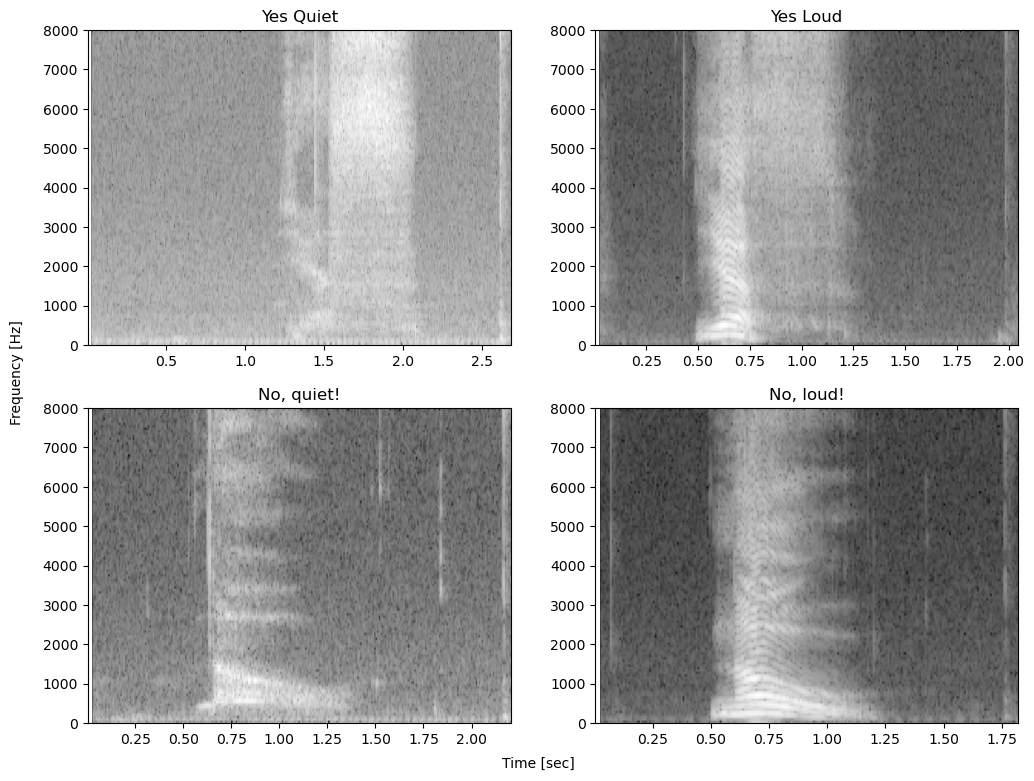

In [ ]:
####### CALCULATE AND PLOT THE SPECTROGRAM OF THE RECORDED AUDIO FILES.

spectrogram = {} 

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2)

spectrogram['yes_quiet'], freqs, bins, im = ax1.specgram(audio['yes_quiet'], Fs = rate['yes_quiet'])
ax1.set_title("Yes Quiet")

spectrogram['yes_loud'], freqs, bins, im = ax2.specgram(audio['yes_loud'], Fs = rate['yes_loud'])
ax2.set_title("Yes Loud")

spectrogram['no_quiet'], freqs, bins, im = ax3.specgram(audio['no_quiet'], Fs = rate['no_quiet'])
ax3.set_title("No, quiet!")

spectrogram['no_loud'], freqs, bins, im = ax4.specgram(audio['no_loud'], Fs = rate['no_loud'])
ax4.set_title("No, loud!")

####### WRITE THE CODE FOR THE OTHER THREE AUDIO FILES.

fig.set_size_inches(12, 9)
fig.text(0.5, 0.06, 'Time [sec]', ha='center')
fig.text(0.06, 0.5, 'Frequency [Hz]', va='center', rotation='vertical')

plt.show()

In [510]:
def flatten_spectrogram(audio_spectrograms):
    ###
    #   description:  
    #       this function flattens the spectrograms and makes their lengths equal.
    #  
    #   input parameters: 
    #       audio_spectrograms (dictionary): spectrograms are stored against the keys containing the corresponding spectrogram.
    #   output parameter:
    #       flatten_spectrograms (numpy nd array): returns a N x K numpy array containing N flatten spectrograms of K length. 
    #                                               set K with the maximum length of the flatten spectrogram from the inputs.
    #
    ###

    max_length = max(spec.flatten().shape[0] for spec in audio_spectrograms.values())
    flat = []
    print(max_length)
    #print(len(flattened))
    for val in audio_spectrograms.values():
        
        flattened = val.flatten()
        pad_length = max_length - flattened.shape[0]
        print(pad_length)
        padded_val = np.pad(flattened, (0, pad_length), mode = 'constant')
        print(padded_val)
        flat.append(padded_val)
        
    flatten_spectrograms = np.array(flat)
    return flatten_spectrograms


features_of_audio_files = flatten_spectrogram(spectrogram)


43215
0
[0.00000000e+00 0.00000000e+00 1.82971593e-04 ... 2.01255271e-02
 2.86756951e-03 7.67088512e-05]
10320
[0.00000000e+00 0.00000000e+00 6.05642709e-06 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
7740
[0.00000000e+00 0.00000000e+00 2.49739089e-06 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
13932
[0.00000000e+00 0.00000000e+00 8.99417699e-05 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


#### <strong>Part C:</strong> Compute the PCA components of the recorded signals/commands and use it to spot new audio command.

In [534]:
#######################################
#  Now apply PCA to the spectrograms  # 
#######################################

# Two Version, one returns a 4x4 array, and another returns a 4x43215 array.
"""n_components = min(len(features_of_audio_files), len(features_of_audio_files[0]))
pca = PCA(n_components=n_components) 
principalComponents = pca.fit(features_of_audio_files)
PCASound = pca.components_.reshape((n_components, -1))
print(PCASound.shape)"""



n_components = 4
pca = PCA(n_components=n_components) 
pca.fit(features_of_audio_files)
transformed = pca.transform(features_of_audio_files)
revers = pca.inverse_transform(transformed)

#print(transformed.shape)
transformed
#revers
#print(revers.shape)


array([[-5.64356550e+05, -4.26089209e+06, -1.28413389e+03,
         5.64599896e-09],
       [-7.96250535e+06,  4.82471274e+06, -3.15547462e-03,
        -6.56754995e-08],
       [-5.64165064e+05, -4.26069696e+06,  1.28416493e+03,
         3.24910500e-09],
       [ 9.09102697e+06,  3.69687631e+06, -2.78853288e-02,
         5.68926939e-08]])

In [ ]:
#######################################################################################
#  Compute the WEIGHTS for each of spectrograms considering the principle components  # 
#######################################################################################

# Hint:  for each spectrogram S and each principle component P, compute weight W as below:
#           W = matrix multiply P and (S - average of the principle components). you might need to transpose any one of the elements. 
for S in features_of_audio_files:
    for P in transformed:
    
w = [] # Write your code for W

#### <strong>Part D:</strong> Record new audio and spot/detect it using the weights.

In [ ]:
#####################################################
#   Execute/Run this cell to start recording        #
#   Stop the cell execution to stop the recording   # 
#####################################################
record_audio('test_command')

In [ ]:
filename = # construct the filename with '.wav' extension.  
rate_test, audio_test = # use wav_read method to read the audio file.

# You can hear the audio files you loaded by uncommenting and running the below.
Audio(audio_test, rate = rate_test)

In [ ]:
####### CALCULATE AND PLOT THE SPECTROGRAM OF THE TEST AUDIO.

test_spectrogram = # WRITE YOUR CODE HERE

In [ ]:
####### PREPARE QUERY WITH THE TEST AUDIO, COMPUTE THE WEIGHTS AND COMPUTE SIMILARITY WITH THE RECORDED AUDIOS.

query = # WRITE YOUR CODE TO FLATTEN THE SPECTTROGRAM. HINT: IT SHOULD HAVE SAME LENGTH WITH THE RECORDED ONES.
query_weight = # COMPUTE THE WEIGHT AS IT WAS DONE FOR THE RECORDED AUDIOS.

euclidean_distance = # COMPUTE THE SIMILARITY BETWEEN THE TEST AND RECORDED WEIGHTS WITH EUCLIDEAN DISTANCE MEASURES 
best_match = # FIND OUT THE RECORDED AUDIO MOST SIMILAR TO THE TEST ONE.

In [ ]:
####### PRINT ALL THE SIMILARITY MEASURES AND THE NAME OF THE MOST SIMILAR RECORDED COMMAND.
#######  INSERT YOUR CODE BELOW



## Question 4.
We will consider the sample time-series data 'sampletimeseries.csv' which contains flight information in a particular zone in 2014.

In [ ]:
# Import as Dataframe
df = pd.read_csv('sampletimeseries.csv')
df.head(10)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145,PDX,ANC,194.0,1542,0.0,1.0
1,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830,SEA,CLT,252.0,2279,0.0,4.0
2,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609,PDX,IAH,201.0,1825,0.0,8.0
3,2014,1,1,28.0,-2.0,800.0,-23.0,US,N547UW,466,PDX,CLT,251.0,2282,0.0,28.0
4,2014,1,1,34.0,44.0,325.0,43.0,AS,N762AS,121,SEA,ANC,201.0,1448,0.0,34.0
5,2014,1,1,37.0,82.0,747.0,88.0,DL,N806DN,1823,SEA,DTW,224.0,1927,0.0,37.0
6,2014,1,1,346.0,227.0,936.0,219.0,UA,N14219,1481,SEA,ORD,202.0,1721,3.0,46.0
7,2014,1,1,526.0,-4.0,1148.0,15.0,UA,N813UA,229,PDX,IAH,217.0,1825,5.0,26.0
8,2014,1,1,527.0,7.0,917.0,24.0,UA,N75433,1576,SEA,DEN,136.0,1024,5.0,27.0
9,2014,1,1,536.0,1.0,1334.0,-6.0,UA,N574UA,478,SEA,EWR,268.0,2402,5.0,36.0


#### Perform the following tasks for the dataset in 'sampletimeseries.csv':

#### <strong>Part A:</strong> Find the general statistics and information of the data such as number of rows, columns, data types etc.

In [ ]:
# To better understand the data we cal look at some prilimiary statistcis.

################################################
#  Print the summary statistics of the dataset #    
#  INSERT YOUR CODE BELOW                      #
################################################





In [ ]:
# The result of the previous cell shows the default percentiles, i.e., 25%, 50%, 75%
# You can also customize the percentiles to get different view of the data 

#######################################################################
#  Print the summary statistics with the 10%, 30, and 70% percentiles #
#  INSERT YOUR CODE BELOW                                             #
#######################################################################




In [ ]:
# Pandas dataframe has some built-in functions that can come in handy for the initial investigation of the dataset.
# Print number of rows, columns, data types etc.

###############################################
#  Print the Number of samples in the dataset #    
###############################################
# Complete the CODE
print('Number of rows:')



######################################################
#  Print the Number of coloumns and the column names #    
######################################################
# Complete the CODE    
print('Number of columns:')
print('Columns are:')



##############################################
#  Print availble data types in the data set #    
##############################################
# Complete the CODE    
print('DATATYPES:')



#### <strong>Part B:</strong> Consider any three columns and analyse them using plotting tools such as boxplot and histogram.

In [ ]:
# Two basic but important plotting tools are boxplot and histogram. 
# These two plots help not only to visualize data but to understand better the distribution of data. 
# Consider any three interesting columns to look at and better understand the data.


################################
#  Create boxplots for columns #
#  INSERT YOUR CODE BELOW.     #
################################




#################################
#  Create histogram for columns #
#  INSERT YOUR CODE BELOW.      #
#################################



#### <strong>Part C:</strong> Find all the missing values and use appropriate methods to fill the missing values.

In [ ]:
# Does the given dataset contain any missing values?
# Find the following two:
#     - which columns contain missing values
#     - percentage of missing values for each column


#############################
#  INSERT YOUR CODE BELOW.  #
#############################



In [ ]:
# Use appropriate method handle missing values.
# The things to think about: 
#    - what method to apply?
#    - Shall I remove the missing values?
#    - How much data will we lose if we remove missing values?
#    - Can we replace missing values with something else? How will that affect the analysis in future?

#############################
#  INSERT YOUR CODE BELOW.  #
#############################




#### <strong>Part D:</strong> Convert the categorical values into numerical values using any appropriate methods.

In [ ]:
# The task is to change categorical values into neumerical ones to make flexible for any data analysis
# Consider the columuns in the dataframe that represents categorical values
# You should use appropriate method for the conversion.

#############################
#  INSERT YOUR CODE BELOW.  #   
#############################




## The assignment is completed, great work!!!